Original image shape: Rows: 512, Columns: 512, Channels: 3


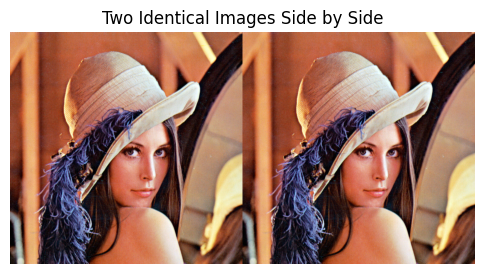

Applied translation (shifted 100 pixels x, 50 pixels y)


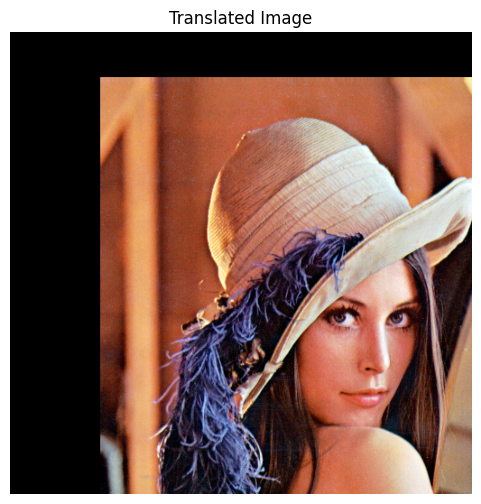

Applied horizontal reflection (X-axis)


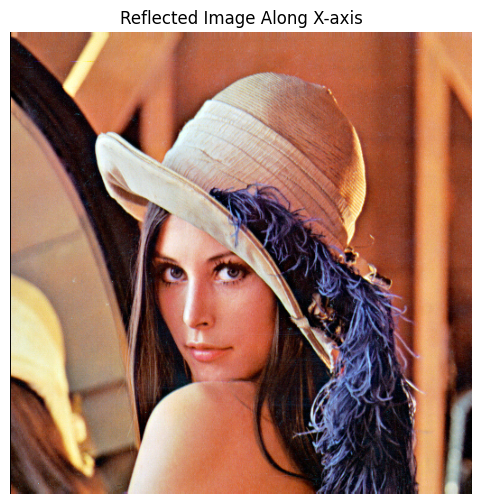

Applied vertical reflection (Y-axis)


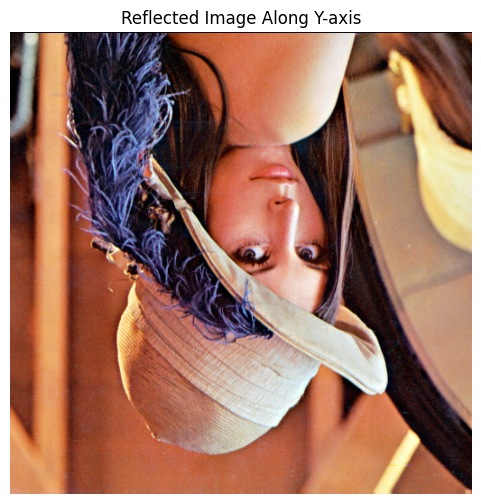

Applied rotation of 45° with scale 0.6


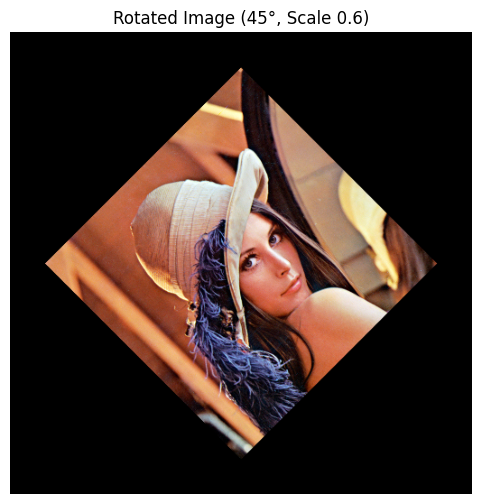

Applied scaling (2x X, 4x Y)


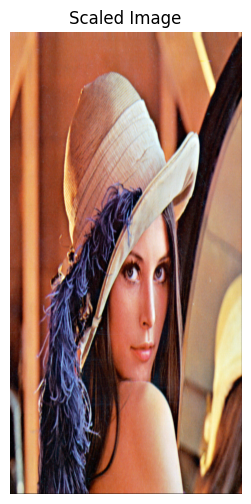

Applied X-axis shearing (Shx=0.5)


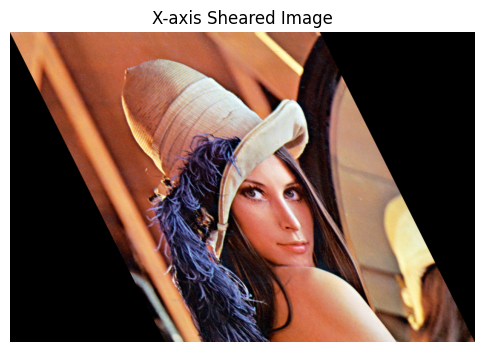

Applied X and Y-axis shearing (Shx=0.5, Shy=0.6)


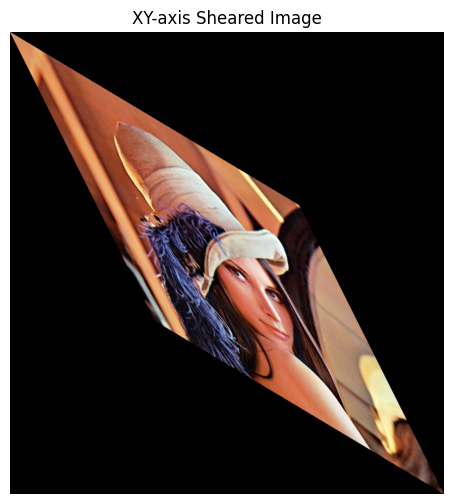

In [1]:
# Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Inline display for Jupyter
%matplotlib inline

# Helper function to display images
def show_img(img, title='Image'):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load image (use double backslashes or raw string)
img = cv2.imread("C:\\Users\\HP\\Downloads\\Standard Images\\Lena.jpg")

# Ensure image is loaded
if img is None:
    raise FileNotFoundError("Image not found. Check the path again.")

rows, cols, channels = img.shape
print(f"Original image shape: Rows: {rows}, Columns: {cols}, Channels: {channels}")

# Two images side-by-side
new_canvas = np.zeros((rows, cols * 2, channels), dtype=np.uint8)
new_canvas[:, :cols] = img
new_canvas[:, cols:] = img
show_img(new_canvas, "Two Identical Images Side by Side")

# Translation
trans_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
trans_img = cv2.warpAffine(img, trans_matrix, (cols, rows))
print("Applied translation (shifted 100 pixels x, 50 pixels y)")
show_img(trans_img, "Translated Image")

# Horizontal Reflection (X-axis)
transform_mat_x = np.float32([[-1, 0, cols], [0, 1, 0], [0, 0, 1]])
reflected_x = cv2.warpPerspective(img, transform_mat_x, (cols, rows))
print("Applied horizontal reflection (X-axis)")
show_img(reflected_x, "Reflected Image Along X-axis")

# Vertical Reflection (Y-axis)
transform_mat_y = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
reflected_y = cv2.warpPerspective(img, transform_mat_y, (cols, rows))
print("Applied vertical reflection (Y-axis)")
show_img(reflected_y, "Reflected Image Along Y-axis")

# Rotation
angle, scale = 45, 0.6
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, scale)
rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
print(f"Applied rotation of {angle}° with scale {scale}")
show_img(rotated_img, f"Rotated Image ({angle}°, Scale {scale})")

# Scaling (2x in X, 4x in Y)
scale_mat = np.float32([[2, 0, 0], [0, 4, 0]])
scaled_img = cv2.warpAffine(img, scale_mat, (cols * 2, rows * 4))
print("Applied scaling (2x X, 4x Y)")
show_img(scaled_img, "Scaled Image")

# Shearing in X
shearing_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_x = cv2.warpAffine(img, shearing_x, (int(cols * 1.5), rows))
print("Applied X-axis shearing (Shx=0.5)")
show_img(sheared_x, "X-axis Sheared Image")

# Shearing in Y
shearing_xy = np.float32([[1, 0.5, 0], [0.6, 1, 0]])
sheared_xy = cv2.warpAffine(img, shearing_xy, (int(cols * 1.5), int(rows * 1.6)))
print("Applied X and Y-axis shearing (Shx=0.5, Shy=0.6)")
show_img(sheared_xy, "XY-axis Sheared Image")